# 第9章 函数图谱
## 9.1 简介
在本章中将努力创建函数图， 从一个基本的函数图开始，逐步解释在代码中加入的所有定制的功能。

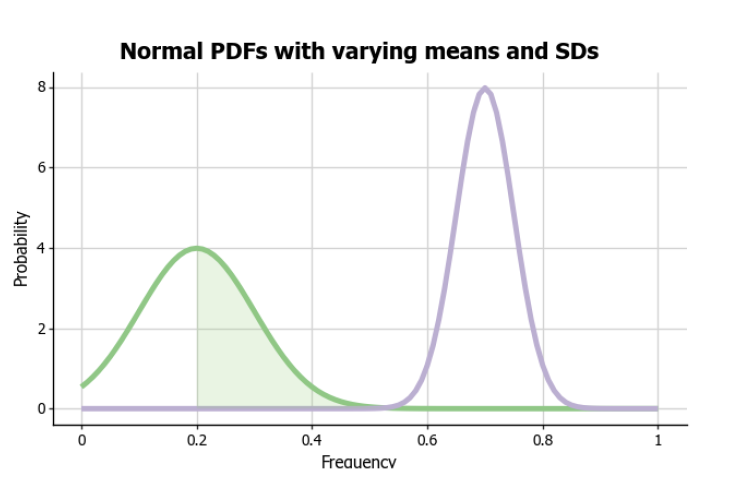

第一步是导入所有需要的包。为此，需要：
- pandas和它的DataFrame类来读入和处理数据
- plotnine来获取数据并创建图表。
- numpy用于在图表中进行一些基本的数学运算
-  scipy.stats来计算概率函数。 

还可以使用来自 plotnine 的 figure_size 函数来改变图形的大小。 plotnine中的figure_size函数来改变图的大小。在本章中，调整了图的大小，使它们更整齐地显示。

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotnine
plotnine.options.figure_size=(7.5, 4.2)
from plotnine import *
from pandas import DataFrame

## 9.2 ggplot的基本结构
为了初始化函数ggplot，向ggplot传递一个DataFrame，们把我们的x变量放在了一个叫做aes的方法中。 aes是对审美映射的简称，它决定了不同变量将如何被映射到图表的哪个部分。图中没有任何东西，如图 9-2所示。为了渲染数据，需要告诉ggplot如何在视觉上表现数据。

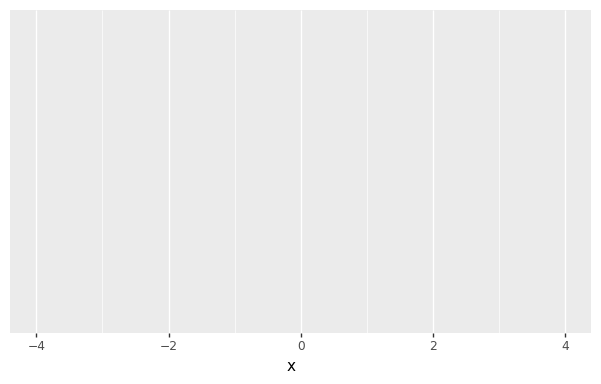

<ggplot: (140475153165)>

In [2]:
p9 = ggplot(DataFrame({"x": [-4, 4]}), aes("x"))
p9

## 9.3 绘制正态曲线
为了绘制一条正态曲线，添加 stat_function() 方法并在参数中添加 st.norm.pdf来作为函数参数，使之成为一条正态曲线，如图 9-3所示。

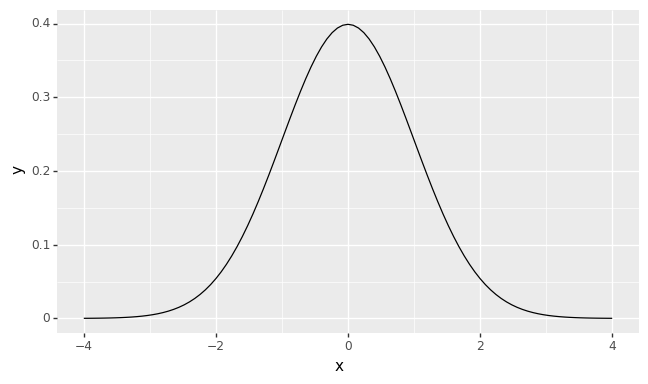

<ggplot: (140508817996)>

In [3]:
p9 = (ggplot(DataFrame({"x": [-4, 4]}), aes("x"))
+ stat_function(fun=st.norm.pdf))
p9

## 9.4 绘制T形曲线
stat_function可以绘制一系列的连续概率密度函数。 包括t（t）、F（f）和$X^2\$PDF。这里将绘制一个t分布，如图 9-4所示。 由于t分布的形状随着样本量的变化而变化。 需要指定df值作为定义曲线的一部分。 需要在定义曲线时指定df值，使用args参数并在字典中传递自由度数值。

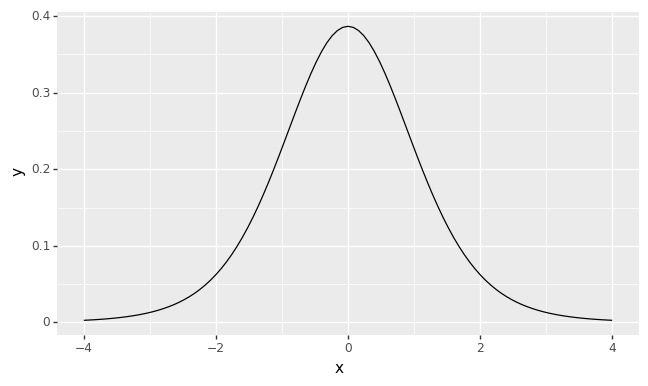

<ggplot: (140508744018)>

In [4]:
p9 = (
ggplot(DataFrame({"x": [-4, 4]}), aes("x"))
+ stat_function(fun=st.t.pdf, args=dict(df=8))
)
p9

## 9.5 绘制自己的函数
也可以绘制自己的函数，只要它采用公式的形式 ，将一个X值转换成一个Y值。在这里，绘制了一条曲线，它返回 y值是x的立方乘以0.5，如图 9-5所示。

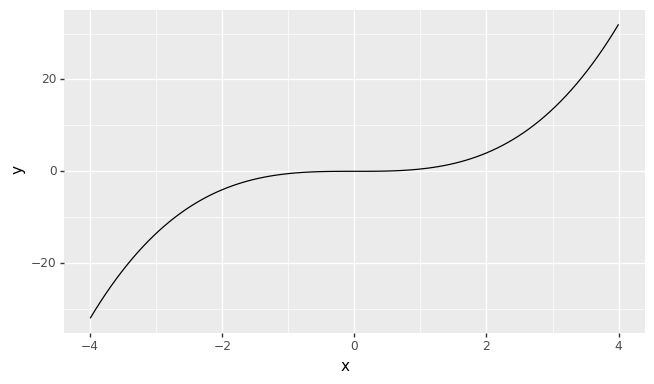

<ggplot: (140508784032)>

In [5]:
def cubeFunc(x):
    return x ** 3 * 0.5
p9 = (
ggplot(DataFrame({"x": [-4, 4]}), aes("x"))
+ stat_function(fun=cubeFunc)
)
p9

## 9.6 在同一图表上绘制多个函数
可以在同一张图表上绘制多个函数，只需为每条曲线添加一个 stat_function()。在这里，将两条正态曲线：一条是平均数为 0.2，标准差为 0.1，另一条 平均数为0.7，标准差为0.05绘制在同一图表中 (注意st.norm.pdf 函数的默认平均数为0，默认标准差为1），如图 9-6所示。可以看到，这里已经将X轴的范围改为 0和1之间。

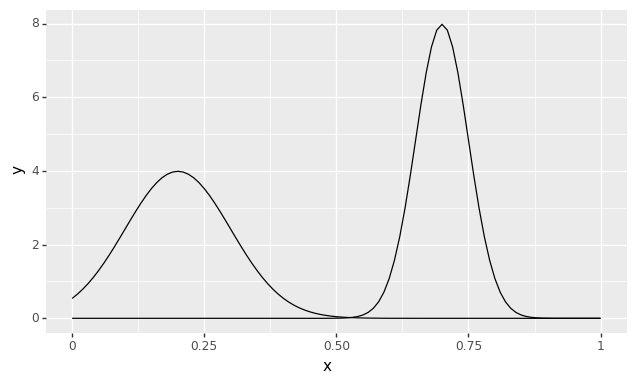

<ggplot: (140508851984)>

In [6]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1))
+ stat_function(fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05))
)
p9

## 9.7 调整轴的刻度
接下来我们要改变的是坐标轴的刻度。让我们使X轴的刻度出现在
每0.2个单位而不是0.25个单位。我们可以通过添加以下选项来做到这一点
scale_x_continuous，并告诉它你想让刻度线出现在哪里。而不是
而不是手动输入整个列表，你可以使用numpy的range函数2
它可以从你选择的开始、停止和步骤值中分别生成一个序列。
(注意，由于 Python 的索引方式，我们需要将
停止值要刚好超过我们想要的结束值)。我们还可以确保
x轴在我们想要的地方开始和结束，我们还可以通过添加参数 limits
= [0, 1] 到 scale_x_continuous。

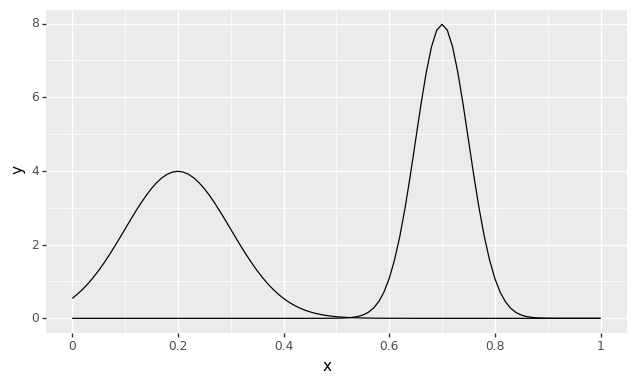

<ggplot: (140508730070)>

In [7]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1))
+ stat_function(fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05))
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
)
p9

## 9.8 调整轴标签和添加标题
为了添加标题，在ggtitle方法中加入了图形的名称作为一个字符串参数。要改变轴的名称，同样要使用labx方法以及laby方法，如图 9-8所示。

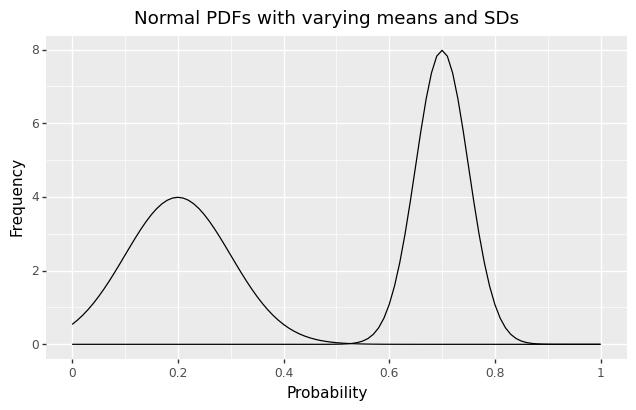

<ggplot: (140508924157)>

In [8]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1))
+ stat_function(fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05))
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
                     limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
)
p9

## 9.9 改变函数线的颜色
有几种不同的方法来改变函数线的颜色。 首先是使用颜色名称。 plotnine 使用 matplotlib 使用的调色板。 ggplot 识别matplotlib的全套颜色名称，将一个函数的线条颜色改为 Rebecca紫色，另一个改为金色，方法是在stat_function()的颜色参数中添加这些名字。

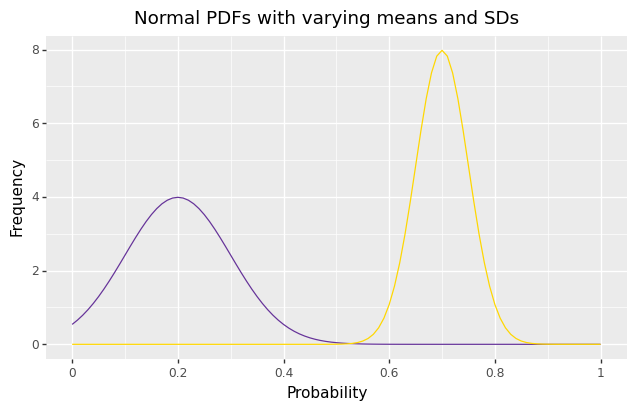

<ggplot: (140508893239)>

In [9]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
fun=st.norm.pdf, args=dict(loc=0.2, scale=0.1),
colour="rebeccapurple"
)
    + stat_function(fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05),
colour="gold")
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
)
p9

也可以指定精确的 HEX颜色，例如，"#FFFFFF"。 下面，用HEX代码为线条赋予了两种深浅不一的蓝色，如图 9-10所示。

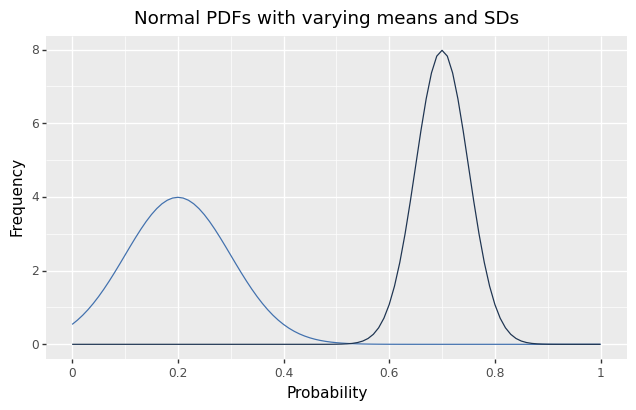

<ggplot: (140508817942)>

In [10]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(fun=st.norm.pdf, args=dict(loc=0.2, scale=0.1),
colour="#4271AE")
+ stat_function(fun=st.norm.pdf, args=dict(loc=0.7, scale=0.05),
colour="#1F3552")
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2), limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
)
p9

## 9.10 添加图例
由于已经添加了两条单独的命令来绘制两条函数曲线，如图 9-11所示。 ggplot不会自动识别出它需要创建哪个图例。可以通过将stat_函数命令中的颜色参数换成es(color=)来制作一个图例。 把函数命令中的颜色参数换成es(color=)，并将希望出现在图例中的组名赋予它，就可以制作一个图例。需要将传递给aes(color=)的名称放在 aes(color=)中，否则 plotnine 会尝试将其解释为 作为 pandas 的列名，还需要添加 scale_colour_manual 命令指定以图例出现的颜色和标题。

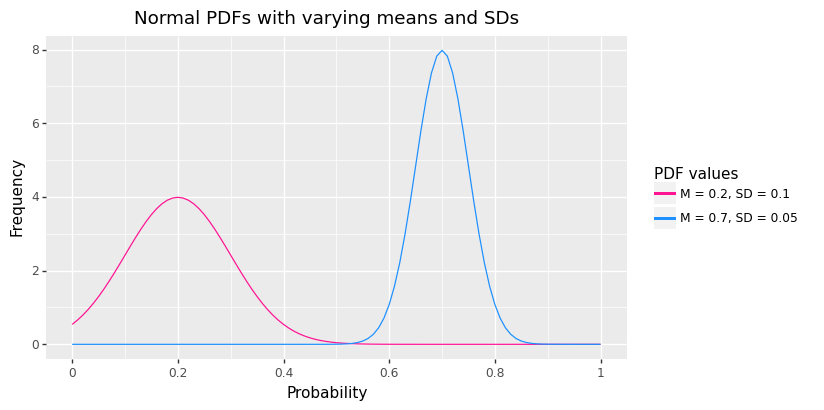

<ggplot: (140508914734)>

In [11]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'),
fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1)
)+
stat_function(
aes(colour='"M = 0.7, SD = 0.05"'),
fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05),
)
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_manual(name="PDF values",
values=["deeppink", "dodgerblue"])
)
p9    

可以把scale_color_manual换成scale_colour_brewer，然后调用喜欢的Brewer颜色方案。可以在这个方法中添加参数name="PDF values "来为图例指定标题，如图 9-12所示。

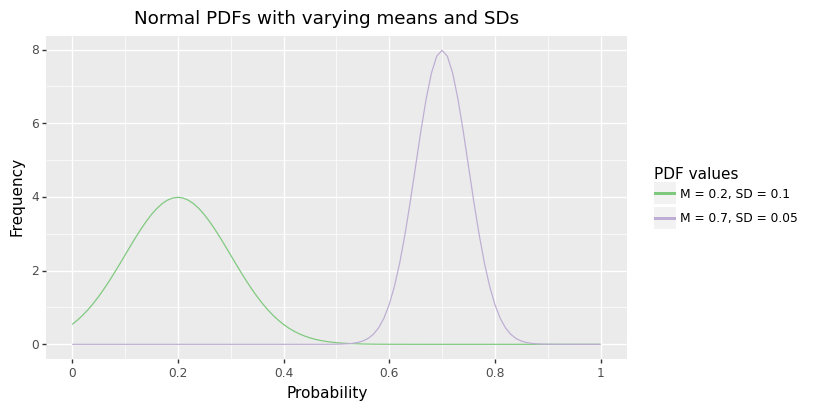

<ggplot: (140509022699)>

In [12]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'),
fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1)
)+
stat_function(
aes(colour='"M = 0.7, SD = 0.05"'),
fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05),
)
    + scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_brewer(type="qual", palette="Accent",
name="PDF values")
)
p9

## 9.11 改变线条的大小
这些线条有点难看，可以使用 stat_function() 中的 size 参数使它们变粗 (或更细)，使用 stat_function()中的 size 参数将每条线的厚度改为2，如图 9-13所示。

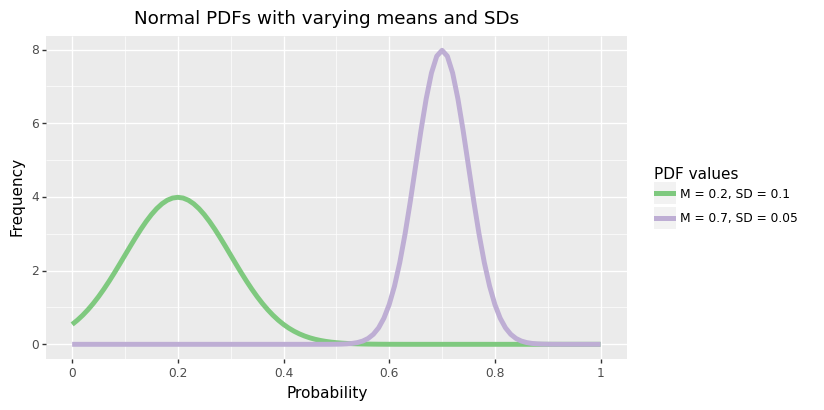

<ggplot: (140508856510)>

In [13]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'),
fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1),
size=2,
)+
stat_function(
aes(colour='"M = 0.7, SD = 0.05"'),
fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05),
    size=2,
)+
scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_brewer(type="qual", palette="Accent",
name="PDF values")
)
p9

## 9.12 使用白色主题
正如前几章所解释的，也可以通过主题来改变图表的整体外观。˙这里将开始使用一个简单的主题定制，在ggplot()后面添加 theme_bw()之后，便有白色主题的图表，如图 9-14所示。

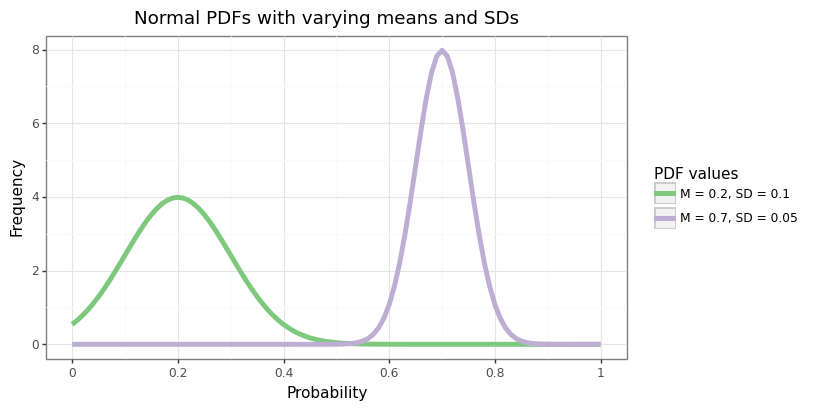

<ggplot: (140509159159)>

In [14]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'),
fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1),
size=2,
)+
stat_function(
    aes(colour='"M = 0.7, SD = 0.05"'),
fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05),
size=2,
)+
scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_brewer(type="qual", palette="Accent",
name="PDF values")
+ theme_bw()
)
p9

## 9.13 创建一个XKCD风格的图表
当然，可能也可以创建自己的主题。 自己的主题具有非常高的定制化程度，包括允许使用自定义字体。 plotnine 已经有一个 theme_xkcd() 实现，但这里还是从头开始创建了一个，更改主题中的其他选项来调整图表的整体外观。 首先需要下载XKCD字体，一旦有了该字体就可以加载它

In [15]:
import matplotlib.font_manager as fm
fpath = "xkcd-Regular.otf"

相反，需要改变导入的字体对象来改变字体大小。由于希望标题和正文有不同的字体大小，可以创建两个不同的 字体对象，title_text和body_set。 然后，可以在这些对象上调用方法。对于标题，把字体改为18号，并使用 set_size()和set_weight()方法将其改为粗体。同样地，把正文的字号改为12号。

In [16]:
title_text = fm.FontProperties(fname=fpath)
body_text = fm.FontProperties(fname=fpath)
# Alter size and weight of font objects
title_text.set_size(18)
title_text.set_weight("bold")
body_text.set_size(12)

为了使图表看起来更像XKCD的艺术风格，这里将做一些 更多的变化：
- 改变 axis_line_x 和 axis_line_y 的值可以改变轴线的粗细
- 将 legend_key 的参数设置为 element_blank()，可以去除图例周围的方框
- 为了去除网格线，需要改变四个参数的值: panel_grid_major, panel_grid_minor, panel_border 和 panel_background。
- 为了使用刚刚导入的XKCD字体，需要改变plot_title和text的值。
- 为了将文本的颜色改为黑色（从其默认的灰色）要改变 axis_text_x 和 axis_text_y 的值，如图 9-15所示。

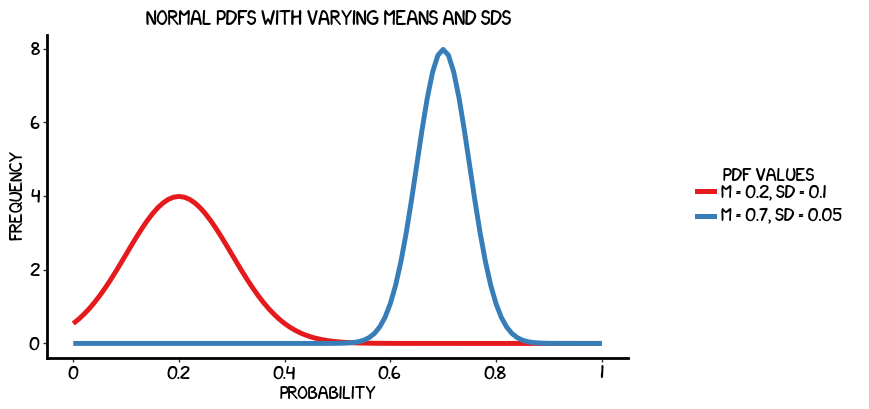

<ggplot: (140509322418)>

In [17]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'), fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1), size=2,
)
+ stat_function(
aes(colour='"M = 0.7, SD = 0.05"'), fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05), size=2,
)
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_brewer(type="qual", palette="Set1",
name="PDF values")
+ theme(
legend_direction="vertical",
legend_title_align="center",
legend_box_spacing=0.5,
legend_entry_spacing_x=10,
legend_key=element_blank(),
axis_line_x=element_line(size=2,
colour="black"),
axis_line_y=element_line(size=2,
colour="black"),
panel_grid_major=element_blank(),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
axis_text_x=element_text(colour="black"),
axis_text_y=element_text(colour="black"),
)
)
p9

## 9.14 使用 "538 "主题
ggplot软件包有更多的预建主题可供选择，下面应用了theme_538()。 该主题与FiveThirtyEight网站上的图表相近。使用了 "Atlas Grotesk "和 "Decima Mono Pro'  字体在 axis_title, legend_title, legend_text, plot_title 和 text 中。这只是 只是为了使这些图与网站上的图完全一样，而且完全是可选的，如图 9-16所示。

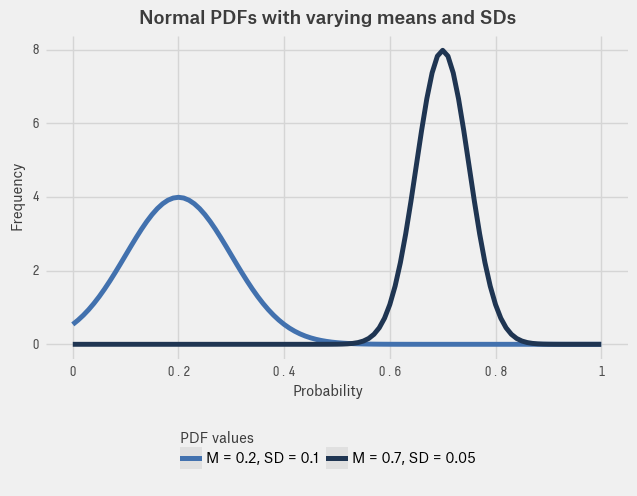

<ggplot: (140509314979)>

In [18]:
agm = "AtlasGrotesk-Medium.otf"
agr = "AtlasGrotesk-Regular.otf"
dp = "DecimaMonoPro.otf"

title_text = fm.FontProperties(fname=agm)
legend_text = fm.FontProperties(fname=agr)
axis_text = fm.FontProperties(fname=agr)
body_text = fm.FontProperties(fname=dp)
# Alter size and weight of font objects
title_text.set_size(16)
legend_text.set_size(10)

body_text.set_size(10)
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'), fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1), size=2,
)
+ stat_function(
aes(colour='"M = 0.7, SD = 0.05"'), fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05), size=2,
)
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_manual(name="PDF values",
values=["#4271AE", "#1F3552"])
+ theme_538()
+ theme(
axis_title=element_text(fontproperties=axis_text),
legend_position="bottom",
legend_direction="horizontal",
legend_box_spacing=0.5,
legend_title=element_text(fontproperties=axis_text),
legend_text=element_text(fontproperties=legend_text),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
)
)
p9

## 9.15 创建自己的主题
现在已经探索了主题定制中的一些可用选项。 现在可以建立自己的完全定制的主题。
- 改变 axis_line 的大小和颜色参数，可以使线条变粗并将其颜色改为黑色
- 改变传递给panel_grid_major的颜色参数意味着所有的网格线现在是浅灰色的
- 通过改变 panel_grid_major 的参数来去除次要网格线和背景。 同样，通过改变 panel_grid_minor、panel_border 和 panel_background 的参数来去除次要网格线和背景。
- 使用标准字体Tahoma

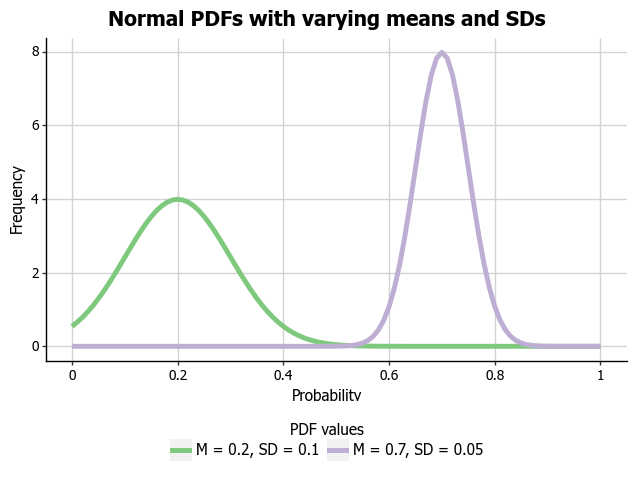

<ggplot: (140509332583)>

In [19]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'), fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1), size=2,
    )+
stat_function(
aes(colour='"M = 0.7, SD = 0.05"'), fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05), size=2,
)
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_brewer(type="qual", palette="Accent",
name="PDF values")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
legend_box_spacing=0.4,
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p9

## 9.16 添加曲线下的区域
如果想对曲线下的面积进行着色，首先需要创建一个额外的 DataFrame。这个DataFrame包含了想要遮蔽的曲线部分的所有X值。 然后从这个分布中生成所有相关的y值 从这个分布中生成所有相关的Y值。可以创建一个 DataFrame，可以遍历从中位数（0.2）到 上限(0.6)之间的所有数值，并从st.norm.pdf(i. loc=0.2, scale=0.6)中提取匹配的y值。 loc=0.2, scale=0.1）。

In [20]:
d1 = DataFrame({
"x": 0.2,
"y": st.norm.pdf(0.2, loc=0.2, scale=0.1)
}, index=[0])
for i in np.arange(0.21, 0.6, 0.01):
    d1 = d1.append(DataFrame({
                       "x": i,"y": st.norm.pdf(i, loc=0.2, scale=0.1)}, index=[0]))
d1 = d1.reset_index(drop=True)

C:\Users\xu\AppData\Local\Temp\ipykernel_11372\4005041229.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\xu\AppData\Local\Temp\ipykernel_11372\4005041229.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\xu\AppData\Local\Temp\ipykernel_11372\4005041229.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\xu\AppData\Local\Temp\ipykernel_11372\4005041229.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\xu\AppData\Local\Temp\ipykernel_11372\4005041229.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\xu\App

然后可以把这个DataFrame作为一个面积曲线添加到图中（geom_area(d1, aes("x", "y"), fill="#84CA72", alpha=0.2））。看到，把它做成了与函数线相同的颜色，但使用了alpha参数使其略微透明，如图 9-18所示。 

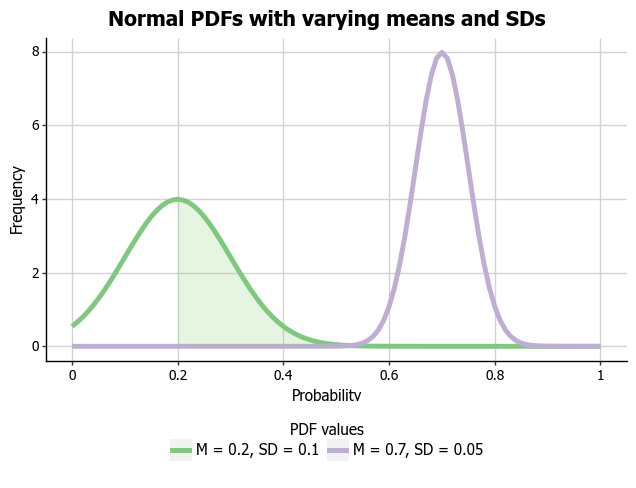

<ggplot: (140509113887)>

In [21]:
p9 = (
ggplot(DataFrame({"x": [-0, 1]}), aes("x"))
+ stat_function(
aes(colour='"M = 0.2, SD = 0.1"'), fun=st.norm.pdf,
args=dict(loc=0.2, scale=0.1), size=2,
)
+ stat_function(
aes(colour='"M = 0.7, SD = 0.05"'), fun=st.norm.pdf,
args=dict(loc=0.7, scale=0.05), size=2,
)
+ geom_area(d1, aes("x", "y"), fill="#84CA72",
alpha=0.2)
+ scale_x_continuous(breaks=np.arange(0, 1.1, 0.2),
limits=[0, 1])
+ ggtitle("Normal PDFs with varying means and SDs")
+ labs(x="Probability", y="Frequency")
+ scale_colour_brewer(type="qual", palette="Accent",
name="PDF values")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
legend_box_spacing=0.4,
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p9

有了这个补充可以看到本章开头的图表。